<a href="https://colab.research.google.com/github/alaa-alt/ML1_FinalProject/blob/main/ML1_Final_Project_Alaa_Abdelmonsef_Elkaffas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Gesture Classification Using MediaPipe Landmarks from the HaGRID Dataset


---



## 1. Importing necessary libraries

In [1]:
!pip install mediapipe

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## 2. Data loading

In [3]:
url = "https://media.githubusercontent.com/media/alaa-alt/ML1_FinalProject/refs/heads/main/hand_landmarks_data.csv"
df = pd.read_csv(url)
df.head()


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [4]:
df.columns

Index(['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4',
       'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7', 'x8', 'y8', 'z8',
       'x9', 'y9', 'z9', 'x10', 'y10', 'z10', 'x11', 'y11', 'z11', 'x12',
       'y12', 'z12', 'x13', 'y13', 'z13', 'x14', 'y14', 'z14', 'x15', 'y15',
       'z15', 'x16', 'y16', 'z16', 'x17', 'y17', 'z17', 'x18', 'y18', 'z18',
       'x19', 'y19', 'z19', 'x20', 'y20', 'z20', 'x21', 'y21', 'z21', 'label'],
      dtype='object')

## 3. Data Visualization

In [5]:
df.isnull().values.any()

False

In [6]:
df.dtypes

,0
x1,float64
y1,float64
z1,float64
x2,float64
y2,float64
...,...
z20,float64
x21,float64
y21,float64
z21,float64


In [7]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'y1'}>,
        <Axes: title={'center': 'z1'}>, <Axes: title={'center': 'x2'}>,
        <Axes: title={'center': 'y2'}>, <Axes: title={'center': 'z2'}>,
        <Axes: title={'center': 'x3'}>, <Axes: title={'center': 'y3'}>],
       [<Axes: title={'center': 'z3'}>, <Axes: title={'center': 'x4'}>,
        <Axes: title={'center': 'y4'}>, <Axes: title={'center': 'z4'}>,
        <Axes: title={'center': 'x5'}>, <Axes: title={'center': 'y5'}>,
        <Axes: title={'center': 'z5'}>, <Axes: title={'center': 'x6'}>],
       [<Axes: title={'center': 'y6'}>, <Axes: title={'center': 'z6'}>,
        <Axes: title={'center': 'x7'}>, <Axes: title={'center': 'y7'}>,
        <Axes: title={'center': 'z7'}>, <Axes: title={'center': 'x8'}>,
        <Axes: title={'center': 'y8'}>, <Axes: title={'center': 'z8'}>],
       [<Axes: title={'center': 'x9'}>, <Axes: title={'center': 'y9'}>,
        <Axes: title={'center': 'z9'}>, <Axes: title={'center

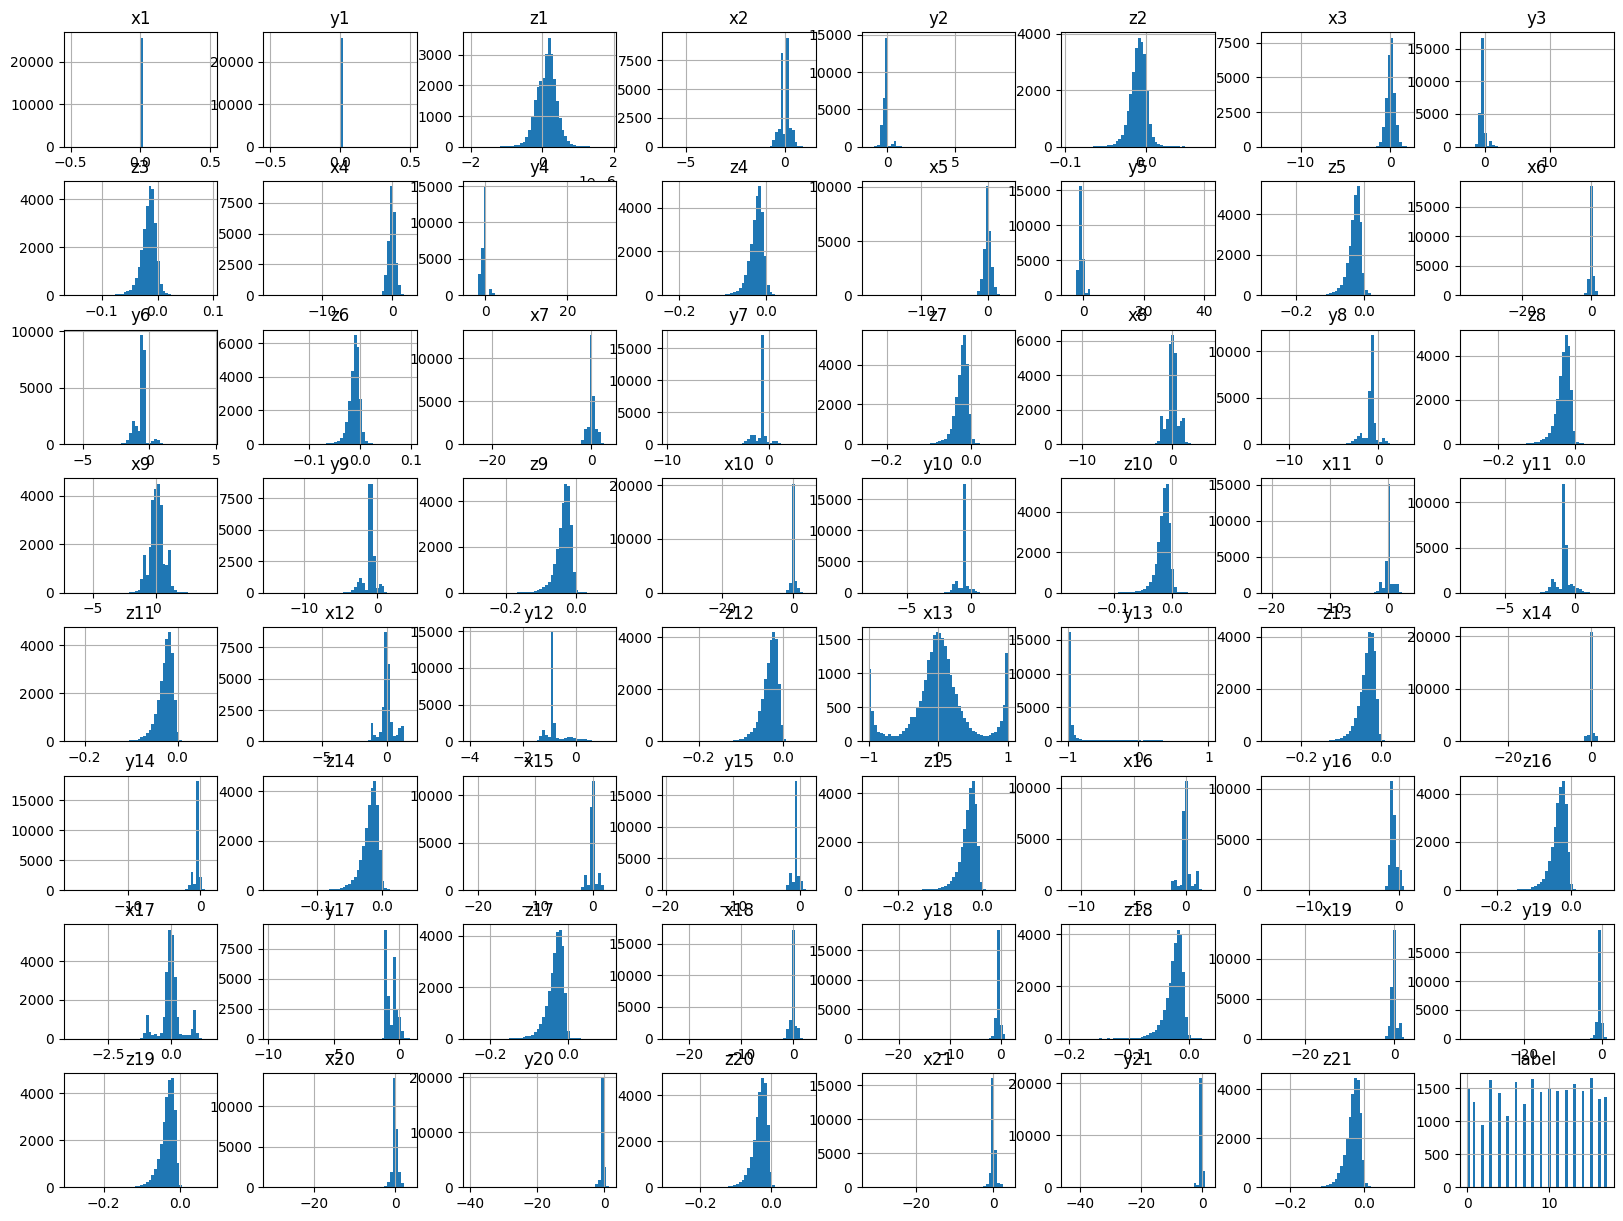

In [21]:
df.hist(bins=50, figsize=(20,15))

### a. Showing landmarks connections from mediapipe

In [8]:
mp_hands = mp.solutions.hands
connections = list(mp_hands.HAND_CONNECTIONS)

### b. Choosing random samples to show

In [9]:
num_samples = 5
samples = df.sample(n=num_samples, random_state=42)

### c. Landmarks of hand and plotting them

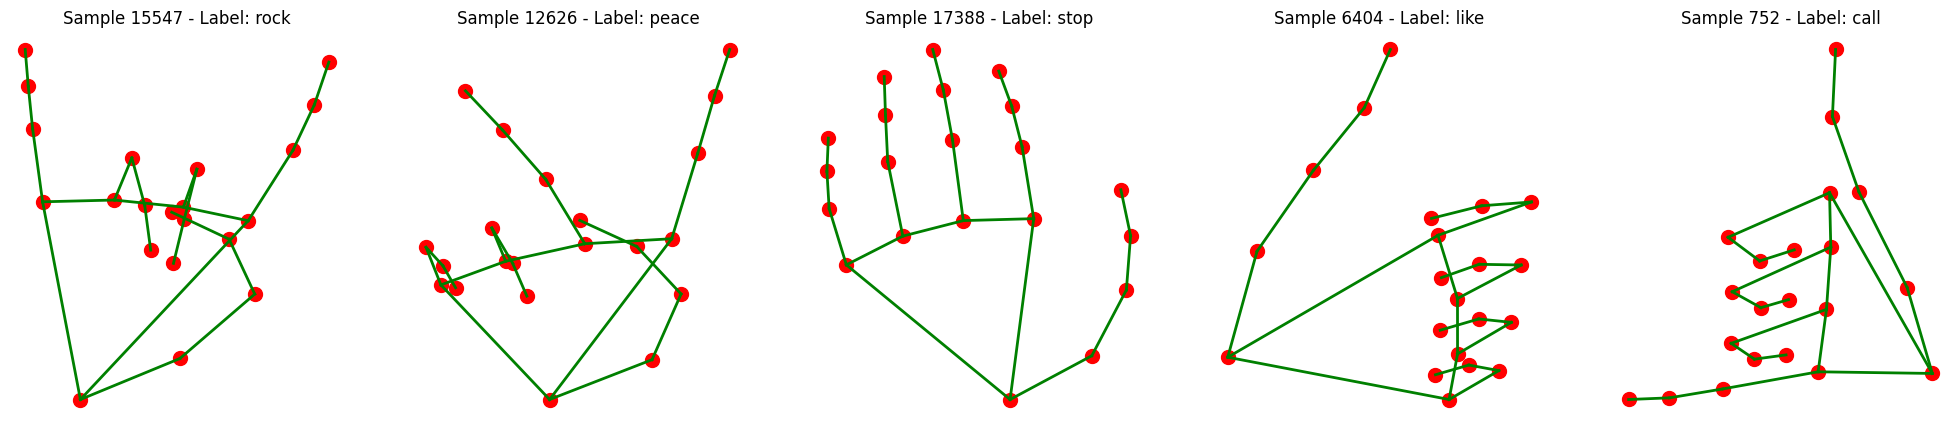

In [10]:
fig, axes = plt.subplots(1, num_samples, figsize=(5 * num_samples, 5))
if num_samples == 1:
    axes = [axes]

for i, (index, row) in enumerate(samples.iterrows()):
    landmarks_x = [row[f"x{j}"] for j in range(1, 22)]
    landmarks_y = [row[f"y{j}"] for j in range(1, 22)]

    # Plot MediaPipe connections
    for connection in connections:
        x_values = [landmarks_x[connection[0]], landmarks_x[connection[1]]]
        y_values = [landmarks_y[connection[0]], landmarks_y[connection[1]]]
        axes[i].plot(x_values, y_values, 'g-', linewidth=2)

    # Plot keypoints
    axes[i].scatter(landmarks_x, landmarks_y, c='red', s=100)
    axes[i].invert_yaxis()
    axes[i].set_title(f"Sample {index} - Label: {row['label']}")
    axes[i].axis("off")

plt.show()

## 4. Hand landmark normalization

In [11]:
def normalize_landmarks(df):
    df = df.copy()  # Copy to avoid modifying original data

    ### Wrist coordinates
    x_wrist, y_wrist = df["x1"], df["y1"]

    ### Middle finger tip coordinates
    x_tip, y_tip = df["x13"], df["y13"]

    ### Compute scale factor
    scale = np.sqrt((x_tip - x_wrist) ** 2 + (y_tip - y_wrist) ** 2)
    scale = np.maximum(scale, 1e-6)

    ### Normalize all x, y coordinates
    for j in range(1, 22):
        df[f"x{j}"] = (df[f"x{j}"] - x_wrist) / scale
        df[f"y{j}"] = (df[f"y{j}"] - y_wrist) / scale

    return df

# Apply the function
df = normalize_landmarks(df)


In [12]:
df.head()


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


## 5. Label encoding the label column

In [13]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
label_mapping = {label: idx for idx, label in enumerate(encoder.classes_)}
print(label_mapping)

{'call': 0, 'dislike': 1, 'fist': 2, 'four': 3, 'like': 4, 'mute': 5, 'ok': 6, 'one': 7, 'palm': 8, 'peace': 9, 'peace_inverted': 10, 'rock': 11, 'stop': 12, 'stop_inverted': 13, 'three': 14, 'three2': 15, 'two_up': 16, 'two_up_inverted': 17}


In [14]:
encoder.inverse_transform(df['label'].unique())

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

## 6. Splitting the data

In [16]:
features = df.drop('label', axis=1)
labels = df['label']

In [18]:
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [19]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

15405
5135
5135
15405
5135
5135
